In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from GravNN.Networks.Networks import ResNet, TraditionalNet

In [2]:
df_80 = pd.read_pickle('C:\\Users\\John\\Documents\\Research\\ML_Gravity\\Data\\Dataframes\\hyperparameter_moon_pinn_80_v10.data')
df_40 = pd.read_pickle('C:\\Users\\John\\Documents\\Research\\ML_Gravity\\Data\\Dataframes\\hyperparameter_moon_pinn_40_v10.data')
df_20 = pd.read_pickle('C:\\Users\\John\\Documents\\Research\\ML_Gravity\\Data\\Dataframes\\hyperparameter_moon_pinn_20_v10.data')
df_10 = pd.read_pickle('C:\\Users\\John\\Documents\\Research\\ML_Gravity\\Data\\Dataframes\\hyperparameter_moon_pinn_10_v10.data')


In [3]:
df_20.iloc[0]#[['params', 'epochs','Brillouin_param_rse_mean', 'Brillouin_param_sigma_2_mean', 'batch_size', 'decay_rate_epoch','learning_rate', 'decay_rate', 'activation']].sort_values(by='Brillouin_param_rse_mean')

Brillouin_max_error                                                         0.0233913
Brillouin_param_rse_mean                                                           54
Brillouin_param_rse_median                                                         50
Brillouin_param_sigma_2_c_mean                                                     52
Brillouin_param_sigma_2_c_median                                                   50
                                                          ...                        
scale_by                                                                            a
size                                                                            14333
time_delta                                                                    42013.1
u_transformer                       <GravNN.Preprocessors.UniformScaler.UniformSca...
x_transformer                                     MinMaxScaler(feature_range=(-1, 1))
Name: Fri May  7 13:10:04 2021, Length: 68, dtype: obj

In [4]:
df_40[['params', 'epochs','Brillouin_param_rse_mean', 'Brillouin_param_sigma_2_mean', 'batch_size', 'decay_rate_epoch','learning_rate', 'decay_rate', 'activation']].sort_values(by='Brillouin_param_rse_mean')

,params,epochs,Brillouin_param_rse_mean,Brillouin_param_sigma_2_mean,batch_size,decay_rate_epoch,learning_rate,decay_rate,activation
timetag,,,,,,,,,
Thu May 20 05:23:30 2021,11680,100000,101.0,118.0,262144,25000,0.005,2.0,gelu


In [5]:
series_10 = df_10.sort_values(by='Brillouin_param_sigma_2_mean', ascending=False).iloc[0]
series_20 = df_20.sort_values(by='Brillouin_param_sigma_2_mean', ascending=False).iloc[0]
series_40 = df_40.sort_values(by='Brillouin_param_sigma_2_mean', ascending=False).iloc[0]
series_80 = df_80.sort_values(by='Brillouin_param_sigma_2_mean', ascending=False).iloc[0]

In [6]:
#consolidated_df = pd.DataFrame([series_10, series_20, series_40, series_80])
consolidated_df = pd.DataFrame([df_10.iloc[0], df_20.iloc[0], df_40.iloc[0], df_80.iloc[0]])

consolidated_df#[['params', 'epochs','Brillouin_param_rse_mean', 'Brillouin_param_sigma_2_mean', 'batch_size', 'decay_rate_epoch','learning_rate', 'decay_rate', 'activation']].sort_values(by='Brillouin_param_rse_mean')

,Brillouin_max_error,Brillouin_param_rse_mean,Brillouin_param_rse_median,Brillouin_param_sigma_2_c_mean,Brillouin_param_sigma_2_c_median,Brillouin_param_sigma_2_mean,Brillouin_param_sigma_2_median,Brillouin_param_sigma_3_c_mean,Brillouin_param_sigma_3_c_median,Brillouin_param_sigma_3_mean,...,Brillouin_param_sigma_1_c_mean,Brillouin_param_sigma_1_c_median,Brillouin_param_sigma_1_mean,Brillouin_param_sigma_1_median,Brillouin_sigma_1_c_mean,Brillouin_sigma_1_c_median,Brillouin_sigma_1_c_std,Brillouin_sigma_1_mean,Brillouin_sigma_1_median,Brillouin_sigma_1_std
Fri May 7 01:17:20 2021,0.023400,27.0,26.0,26.0,26.0,30.0,25.0,26.0,26.0,30.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Fri May 7 13:10:04 2021,0.023391,54.0,50.0,52.0,50.0,64.0,62.0,53.0,50.0,67.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Thu May 20 05:23:30 2021,0.023598,101.0,100.0,99.0,99.0,118.0,118.0,100.0,100.0,123.0,...,98.0,97.0,109.0,108.0,0.000807,0.000644,0.00058,0.001823,0.001501,0.001495
Sun May 16 12:30:26 2021,0.024217,172.0,170.0,170.0,169.0,207.0,207.0,171.0,169.0,221.0,...,166.0,165.0,193.0,193.0,0.000629,0.000490,0.00049,0.001397,0.000978,0.001385


In [7]:
save_name = 'C:\\Users\\John\\Documents\\Research\\ML_Gravity\\Data\\Dataframes\\moon_pinn_df.data'
consolidated_df.to_pickle(save_name)

In [3]:
import copy
backup = copy.deepcopy(df)

In [9]:
df = consolidated_df
loss_list = []
val_loss_list = []

for history in df['history']:
    loss_list.append(history['loss'][-1])
    val_loss_list.append(history['val_loss'][-1])
df['loss'] = loss_list
df['val_loss'] = val_loss_list

networks = (df['network_type'] == ResNet)
networks.replace(True, 'resnet',inplace=True)
networks.replace(False, 'traditional',inplace=True)
df['network_type'] = networks

df['model_param_est'] = df['Brillouin_param_rse_median']*(df['Brillouin_param_rse_median']+1)

<AxesSubplot:xlabel='network_shape', ylabel='Brillouin_rse_median'>

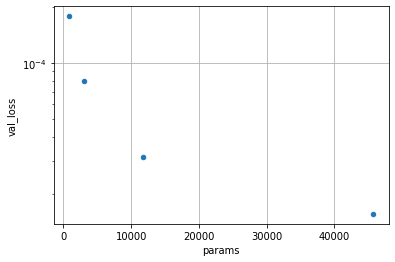

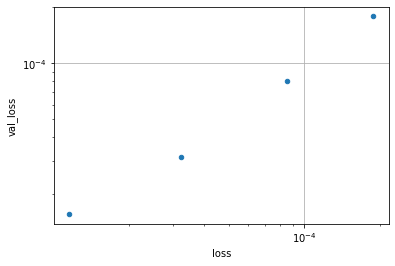

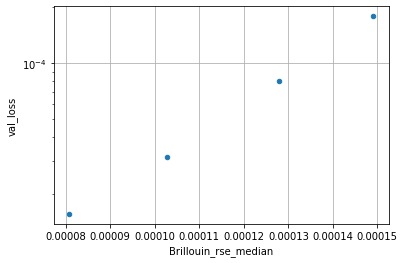

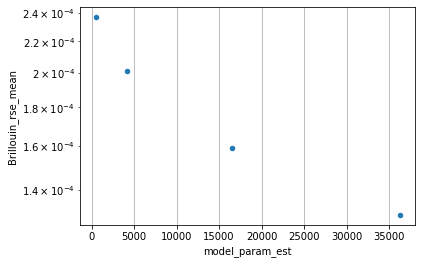

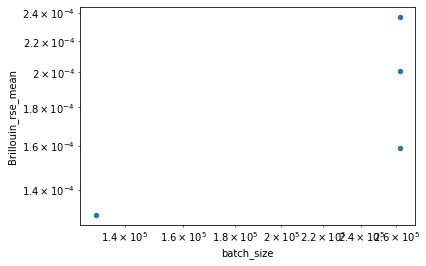

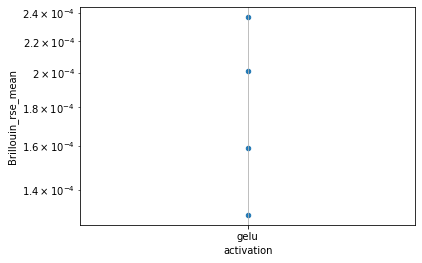

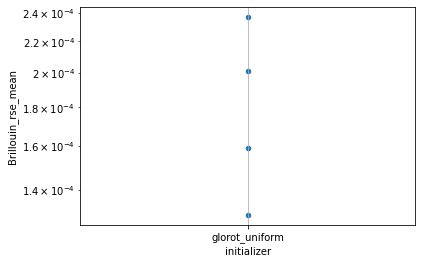

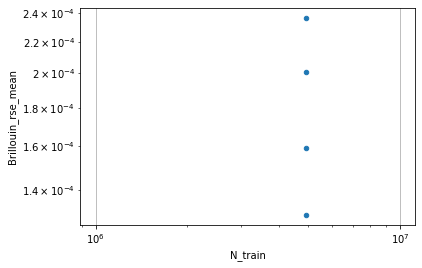

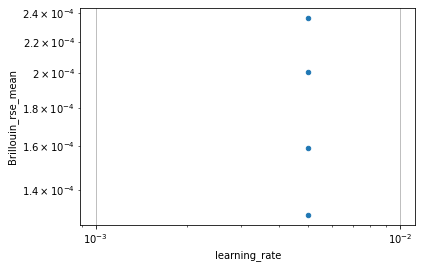

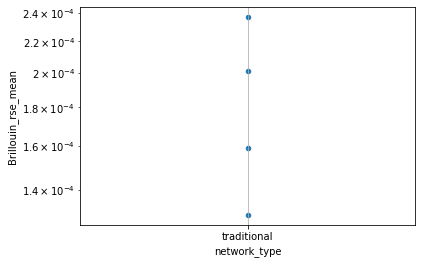

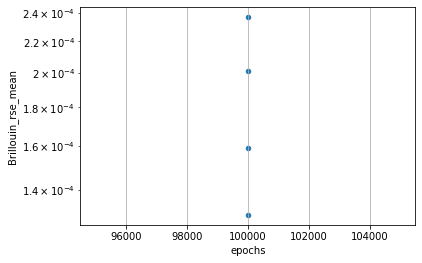

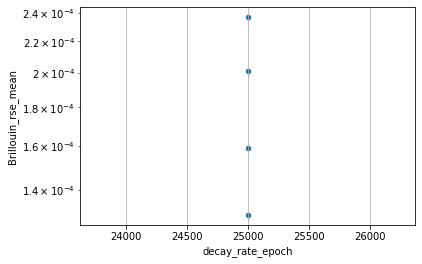

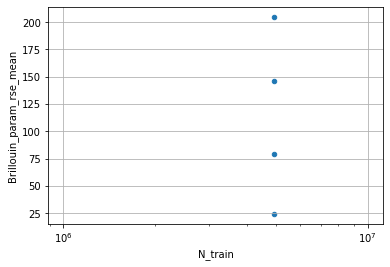

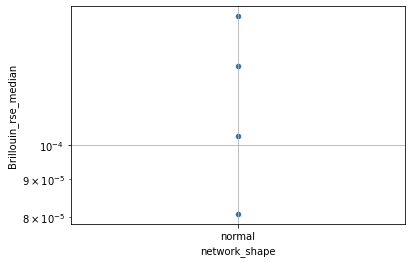

In [10]:
sub_df = df[['params', 'batch_size', 'N_train', 'activation', 'initializer', 'learning_rate', 'network_type', 'loss', 'val_loss']].sort_values(by='val_loss', ascending=False)#, 'Brillouin_sh_diff_median']

min_y = None
max_y = None#0.00650509
max_y = None #0.005
df.plot.scatter('params', 'val_loss', ylim=[min_y, max_y],logy=True, grid=True)
df.plot.scatter('loss', 'val_loss',  ylim=[min_y,max_y],logy=True, logx=True, grid=True)
df.plot.scatter('Brillouin_rse_median', 'val_loss', ylim=[min_y, max_y],logy=True, grid=True)

df.plot.scatter('model_param_est', 'Brillouin_rse_mean', ylim=[min_y, max_y],logy=True, grid=True)
df.plot.scatter('batch_size', 'Brillouin_rse_mean',  ylim=[min_y,max_y], logx=True, logy=True, grid=True)
df.plot.scatter('activation', 'Brillouin_rse_mean',  ylim=[min_y, max_y], logy=True, grid=True)
df.plot.scatter('initializer', 'Brillouin_rse_mean', ylim=[min_y, max_y], logy=True, grid=True)
df.plot.scatter('N_train', 'Brillouin_rse_mean', ylim=[min_y, max_y], logx=True, logy=True, grid=True)
df.plot.scatter('learning_rate', 'Brillouin_rse_mean', ylim=[min_y, max_y], logx=True, logy=True, grid=True)
df.plot.scatter('network_type', 'Brillouin_rse_mean', ylim=[min_y, max_y], logx=False, logy=True, grid=True)
df.plot.scatter('epochs', 'Brillouin_rse_mean', ylim=[min_y, max_y], logx=False, logy=True, grid=True)
df.plot.scatter('decay_rate_epoch', 'Brillouin_rse_mean', ylim=[min_y, max_y], logx=False, logy=True, grid=True)

df.plot.scatter('N_train', 'Brillouin_param_rse_mean', ylim=[min_y, max_y], logx=True, logy=False, grid=True)
df.plot.scatter('network_shape', 'Brillouin_rse_median', ylim=[min_y, max_y],  logy=True, grid=True)

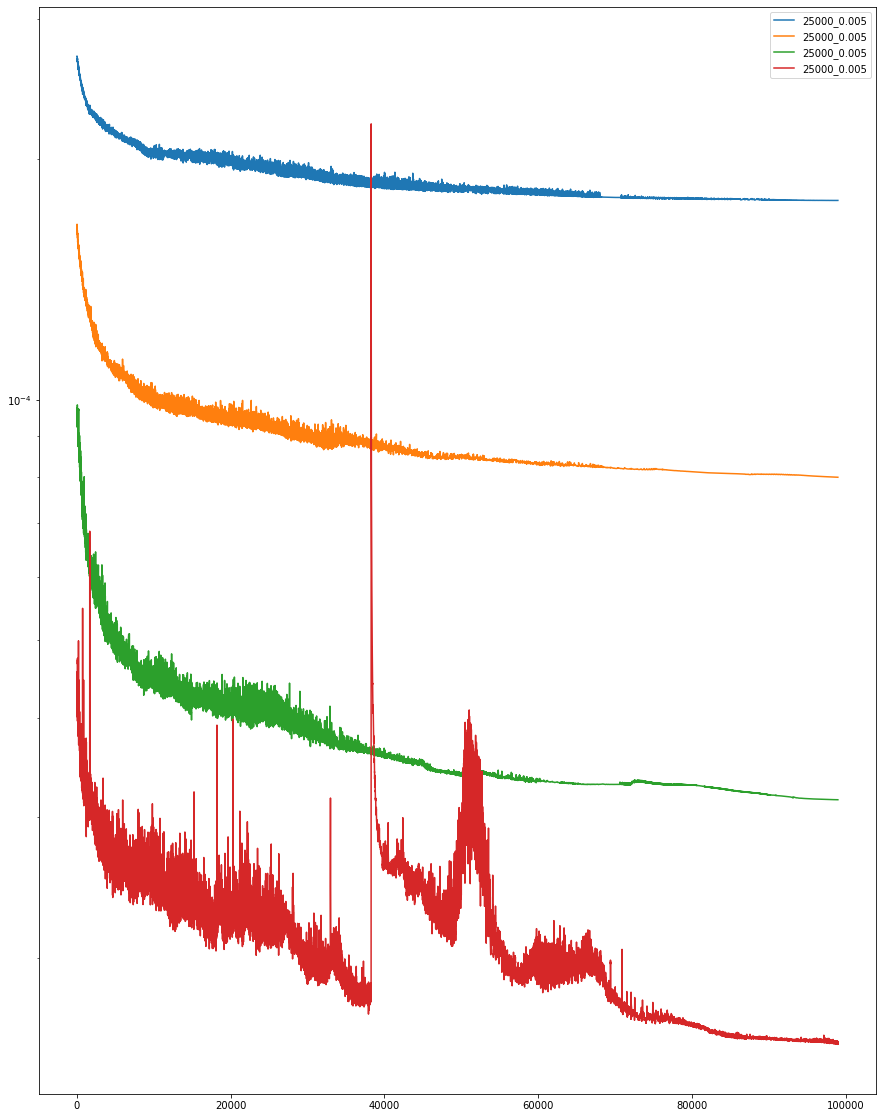

In [16]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

plt.figure(figsize=(15,20))
for i in range(0,len(df)):
    row = df.iloc[i]
    y = row['history']['val_loss']
    x = np.linspace(0,50000,len(y))

    N = 1000
    y_hat = y[N:]
    x_hat = x[N:]
#     poly = np.polyfit(x_hat, y_hat,10)
#     poly_y = np.poly1d(poly)(x_hat)
    poly_y = uniform_filter1d(y_hat, 10)

    alpha = 1
    alpha = 1.0 if row['learning_rate'] == 0.001 else 0.1 # 0.01, 0.005
#     alpha = 1.0 if row['decay_rate'] == 2 else 0.1 # 0.01, 0.005
#     alpha = 1
#     alpha = 1.0 if row['batch_size'] == 32768*4 else 0.1 #  32768
#     alpha = 1.0 if row['decay_rate_epoch'] == 50000 else 0.1 #  32768
    #alpha = 1.0 if row['decay_epoch_0'] == 100000 else 0.1
    #alpha = 1.0 if row['activation'] == 'gelu' else 0.1 # tanh, relu, gelu, swish
    #alpha = 1.0 if row['initializer'] == 'glorot_uniform' else 0.1 # tanh, relu, gelu, swish

    #alpha = 1
    #alpha = 1.0 if row['network_type'] == 'traditional' and row['batch_size'] == 32768 else 0.1
    #alpha = 1.0 if row['activation'] == 'swish' and row['learning_rate'] == 0.005 else 0.1
    #alpha = 1.0 if row['activation'] == 'swish' and row['batch_size'] == 32768 else 0.1
    #alpha = 1.0 if row['activation'] == 'tanh' else 0.1

    alpha = 1.0 if row['epochs'] > 100000 else 0.0# and row['batch_size'] == 32768 else 0.1
    alpha = 1.0 if row['learning_rate'] == 0.02 else 0.1# and row['batch_size'] == 32768 else 0.1

    alpha = 1

    plt.semilogy(poly_y,alpha=alpha, label=str(row['decay_rate_epoch']) + "_" + str(row['learning_rate']))

plt.legend()


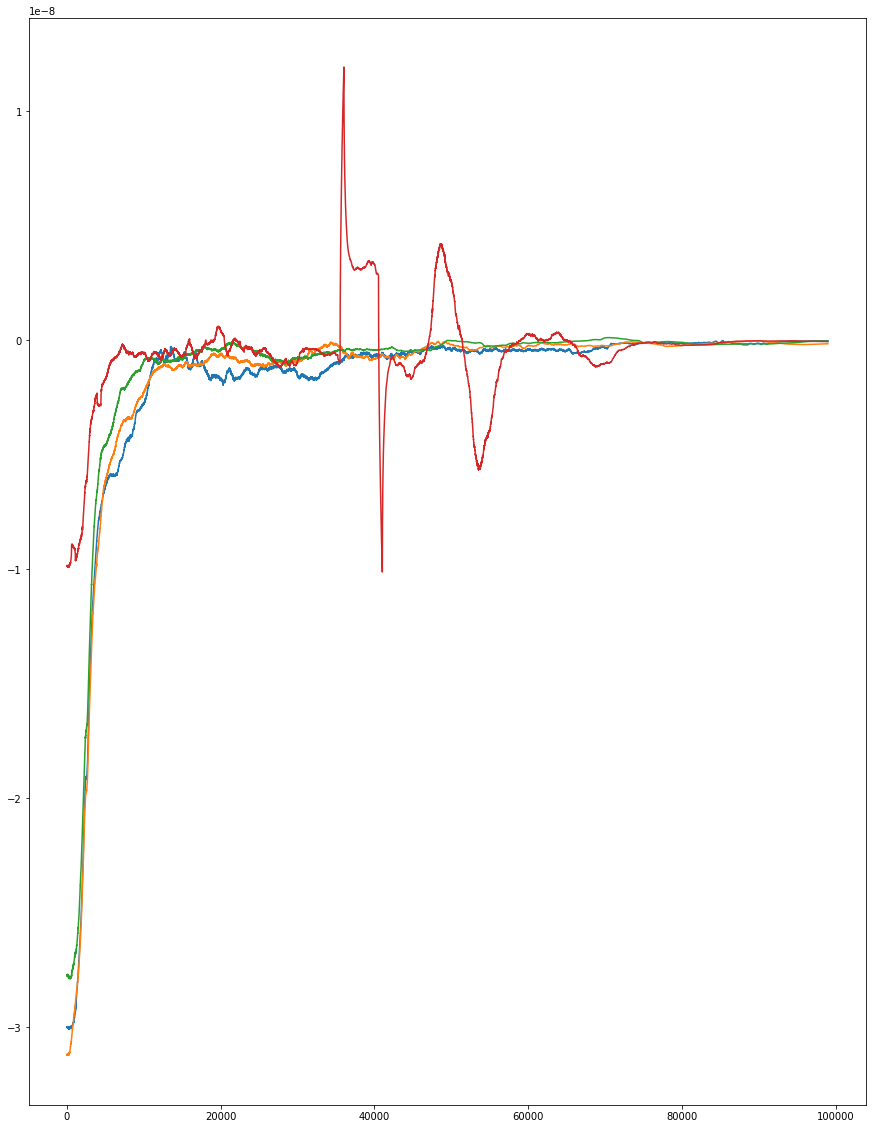

In [12]:
import matplotlib.pyplot as plt
from scipy.ndimage.filters import uniform_filter1d

plt.figure(figsize=(15,20))
for i in range(0,len(df)):
    row = df.iloc[i]
    y = row['history']['val_loss']
    x = np.linspace(0,50000,len(y))
    
    N = 1000
    y_hat = y[N:]
    x_hat = x[N:]
#     poly = np.polyfit(x_hat, y_hat,10)
#     poly_y = np.poly1d(poly)(x_hat)
    poly_y = uniform_filter1d(y_hat, 500)
    alpha = 1.0 if row['learning_rate'] == 0.00005 else 0.1 # 0.00005, 0.0005, 0.005
    #alpha = 1.0 if row['batch_size'] == 2048 else 0.1
    alpha = 1
    grad = np.gradient(poly_y, x_hat)
    grad_poly_y = uniform_filter1d(grad, 5000)

    plt.plot(grad_poly_y,alpha=alpha)
    


In [229]:
df = copy.deepcopy(backup)

In [8]:
backup[['params','Brillouin_param_rse_mean', 'Brillouin_param_sigma_2_mean', 'batch_size', 'decay_rate_epoch','learning_rate', 'decay_rate', 'activation']].sort_values(by='Brillouin_param_rse_mean')

,params,Brillouin_param_rse_mean,Brillouin_param_sigma_2_mean,batch_size,decay_rate_epoch,learning_rate,decay_rate,activation
timetag,,,,,,,,
Tue Apr 13 17:04:00 2021,45923,158.0,193.0,262144,25000,0.005,2.0,gelu


In [9]:
193*194

37442

In [11]:
backup['id'].values

array([2459318.21111111])